In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
import glob

# Load all CSV files from a folder (assuming they are in the same directory)
path = "D:\MAJOR_PROJECT_2025_Anu\dataset"  #  directory path
all_files = glob.glob(path + "/*.csv")

# Concatenate all files into a single DataFrame
data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
# Save the combined dataset to a CSV file before preprocessing
data.to_csv("combined_dataset.csv", index=False)

print("Combined dataset saved successfully!")

Combined dataset saved successfully!


In [4]:
# Load the saved combined dataset
data = pd.read_csv("combined_dataset.csv")
print("Loaded combined dataset from saved file.")


Loaded combined dataset from saved file.


In [5]:
# Check initial dataset statistics
print("Initial Dataset Shape:", data.shape)

Initial Dataset Shape: (2830743, 79)


In [6]:
# Check true NaN values
true_nan_count = data.isna().sum().sum()
print("Total Number of True NaN Values in the Dataset:", true_nan_count)

# Check for other potential missing indicators like empty strings
empty_string_count = (data == "").sum().sum()
print("Total Number of Empty Strings in the Dataset:", empty_string_count)

# Check for whitespace-only entries
whitespace_count = data.apply(lambda x: x.map(lambda y: str(y).isspace()).sum()).sum()
print("Total Number of Whitespace-only Entries in the Dataset:", whitespace_count)

# Summing these to get the total missing count if applicable
total_possible_missing = true_nan_count + empty_string_count + whitespace_count
print("Total Number of Possible Missing Values in the Dataset:", total_possible_missing)

Total Number of True NaN Values in the Dataset: 1358
Total Number of Empty Strings in the Dataset: 0
Total Number of Whitespace-only Entries in the Dataset: 0
Total Number of Possible Missing Values in the Dataset: 1358


In [7]:

# Identify rows with NaN values
nan_rows = data[data.isnull().any(axis=1)]

# Display the number of rows and columns with NaN values
print("Shape of rows with NaN values:", nan_rows.shape)

# Display the rows with NaN values, highlighted for visibility
# nan_rows_highlighted = nan_rows.style.highlight_null()
# nan_rows_highlighted


Shape of rows with NaN values: (1358, 79)


In [8]:
# Remove rows with NaN values
data_cleaned = data.dropna()
print("Shape after removing rows with NaN values:", data_cleaned.shape)


Shape after removing rows with NaN values: (2829385, 79)


In [9]:
# Check for NaN values again after removing rows with NaN values
if data_cleaned.isnull().values.any():
    # Display rows with NaN values if any are still present
    rows_with_nan = data_cleaned[data_cleaned.isnull().any(axis=1)]
    print("Rows containing NaN values:\n", rows_with_nan)
else:
    print("No NaN values remaining in the dataset.")

No NaN values remaining in the dataset.


In [10]:
# Step 1: Ensure all column data types are consistent
data_cleaned = data_cleaned.apply(lambda x: x.astype(str).str.strip() if x.dtypes == 'object' else x)

# Step 2: Identify true duplicate rows (exact match across all columns)
duplicate_rows = data_cleaned[data_cleaned.duplicated(keep=False)]  # Includes all occurrences of duplicates


In [11]:

duplicate_rows.shape

(402526, 79)

In [12]:
#removing the duplicate rows
data_cleaned = data_cleaned.drop_duplicates(keep='first')
print("Shape after removing duplicate rows:", data_cleaned.shape)

Shape after removing duplicate rows: (2522009, 79)


In [13]:
# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index([' Label'], dtype='object')


In [14]:
for col in categorical_columns:
    print(f"Column: {col}")
    print("Unique Values:", data_cleaned[col].unique())
    print()

Column:  Label
Unique Values: ['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']



In [15]:
# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Apply One-Hot Encoding only to categorical columns
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Display the new dataset shape
print("Dataset shape after encoding:", data_encoded.shape)

# Display the updated dataset columns
print("Encoded Columns:", data_encoded.columns)

Categorical Columns: Index([' Label'], dtype='object')
Dataset shape after encoding: (2522009, 92)
Encoded Columns: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Pa

In [16]:
# Inspect problematic columns for extreme values
print("Flow Bytes/s Stats:")
print(data_encoded['Flow Bytes/s'].describe())
print()

print("Flow Packets/s Stats:")
print(data_encoded[' Flow Packets/s'].describe())

Flow Bytes/s Stats:


count    2.522009e+06
mean              inf
std               NaN
min     -2.610000e+08
25%      1.194510e+02
50%      3.722028e+03
75%      1.079162e+05
max               inf
Name: Flow Bytes/s, dtype: float64

Flow Packets/s Stats:
count    2.522009e+06
mean              inf
std               NaN
min     -2.000000e+06
25%      2.028777e+00
50%      7.001036e+01
75%      1.793722e+04
max               inf
Name:  Flow Packets/s, dtype: float64


In [17]:
# Replace infinity values with NaN
import numpy as np

data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Replaced infinity values with NaN.")

Replaced infinity values with NaN.


In [18]:
# Replace NaN with the mean of the column
data_encoded['Flow Bytes/s'] = data_encoded['Flow Bytes/s'].fillna(data_encoded['Flow Bytes/s'].mean())
data_encoded[' Flow Packets/s'] = data_encoded[' Flow Packets/s'].fillna(data_encoded[' Flow Packets/s'].mean())

# Verify no NaN values remain
print("NaN values after filling:", data_encoded[['Flow Bytes/s', ' Flow Packets/s']].isna().sum())

NaN values after filling: Flow Bytes/s       0
 Flow Packets/s    0
dtype: int64


In [19]:
# Cap extreme values to the 1st and 99th percentiles
for col in ['Flow Bytes/s', ' Flow Packets/s']:
    lower_threshold = data_encoded[col].quantile(0.01)  # 1st percentile
    upper_threshold = data_encoded[col].quantile(0.99)  # 99th percentile
    data_encoded[col] = data_encoded[col].clip(lower=lower_threshold, upper=upper_threshold)

# Verify the updated statistics
print(data_encoded[['Flow Bytes/s', ' Flow Packets/s']].describe())

       Flow Bytes/s   Flow Packets/s
count  2.522009e+06     2.522009e+06
mean   4.969893e+05     3.856651e+04
std    1.761494e+06     1.345336e+05
min    0.000000e+00     6.058002e-02
25%    1.194510e+02     2.028777e+00
50%    3.722028e+03     7.001036e+01
75%    1.079162e+05     1.793722e+04
max    1.233333e+07     7.500000e+05


In [20]:
# Find the column(s) with the extreme negative value
numerical_columns = data_encoded.select_dtypes(include=["int64", "float64"]).columns
print(data_encoded[numerical_columns].min())

 Destination Port               0.0
 Flow Duration                -13.0
 Total Fwd Packets              1.0
 Total Backward Packets         0.0
Total Length of Fwd Packets     0.0
                               ... 
 Active Min                     0.0
Idle Mean                       0.0
 Idle Std                       0.0
 Idle Max                       0.0
 Idle Min                       0.0
Length: 78, dtype: float64


In [21]:
# Replace negative values with 0
data_encoded[' Flow Duration'] = data_encoded[' Flow Duration'].clip(lower=0)

In [22]:
lower_threshold = data_encoded[' Flow Duration'].quantile(0.01)
upper_threshold = data_encoded[' Flow Duration'].quantile(0.99)
data_encoded[' Flow Duration'] = data_encoded[' Flow Duration'].clip(lower=lower_threshold, upper=upper_threshold)

In [23]:
print(data_encoded[' Flow Duration'].describe())

count    2.522009e+06
mean     1.657487e+07
std      3.520075e+07
min      3.000000e+00
25%      2.080000e+02
50%      5.058700e+04
75%      5.330376e+06
max      1.179107e+08
Name:  Flow Duration, dtype: float64


In [24]:
# Verify the dataset for any remaining issues
print("Contains Infinity:", np.isinf(data_encoded).any().any())
print("Contains NaN:", data_encoded.isna().any().any())
print("Min:", data_encoded[numerical_columns].min().min())
print("Max:", data_encoded[numerical_columns].max().max())

Contains Infinity: False
Contains NaN: False
Min: -32212234632.0
Max: 655453030.0


In [25]:
# Find columns with extreme negative values
problematic_columns = data_encoded.columns[data_encoded.min() < 0]
print("Columns with negative values:", problematic_columns)

# Display minimum values of these problematic columns
print(data_encoded[problematic_columns].min())

Columns with negative values: Index([' Flow IAT Mean', ' Flow IAT Max', ' Flow IAT Min', ' Fwd IAT Min',
       ' Fwd Header Length', ' Bwd Header Length', ' Fwd Header Length.1',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' min_seg_size_forward'],
      dtype='object')
 Flow IAT Mean             -1.300000e+01
 Flow IAT Max              -1.300000e+01
 Flow IAT Min              -1.400000e+01
 Fwd IAT Min               -1.200000e+01
 Fwd Header Length         -3.221223e+10
 Bwd Header Length         -1.073741e+09
 Fwd Header Length.1       -3.221223e+10
Init_Win_bytes_forward     -1.000000e+00
 Init_Win_bytes_backward   -1.000000e+00
 min_seg_size_forward      -5.368707e+08
dtype: float64


In [26]:
for col in problematic_columns:
    data_encoded[col] = data_encoded[col].clip(lower=0)

In [27]:
# Verify dataset again
print("Contains Infinity:", np.isinf(data_encoded).any().any())
print("Contains NaN:", data_encoded.isna().any().any())
print("Min:", data_encoded[numerical_columns].min().min())
print("Max:", data_encoded[numerical_columns].max().max())

Contains Infinity: False
Contains NaN: False
Min: 0.0
Max: 655453030.0


In [28]:
# Identify columns with max value > 1
problematic_columns = data_encoded[numerical_columns].columns[data_encoded[numerical_columns].max() > 1]
print("Columns with values > 1 after normalization:", problematic_columns)

# Display statistics for these columns
print(data_encoded[problematic_columns].describe())

Columns with values > 1 after normalization: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' Down/Up Ratio',
       ' Average

In [29]:
for col in problematic_columns:
    lower_threshold = data_encoded[col].quantile(0.01)
    upper_threshold = data_encoded[col].quantile(0.99)
    data_encoded[col] = data_encoded[col].clip(lower=lower_threshold, upper=upper_threshold)

In [30]:
# Reinitialize scaler for problematic columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_encoded[problematic_columns] = scaler.fit_transform(data_encoded[problematic_columns])
print("Min-Max Normalization applied successfully!")

Min-Max Normalization applied successfully!


In [31]:
# Verify normalization again
assert data_encoded[numerical_columns].min().min() >= 0, "Normalization failed: Min value < 0"
assert data_encoded[numerical_columns].max().max() <= 1, "Normalization failed: Max value > 1"
print("Normalization verified: All values in range [0, 1]")

Normalization verified: All values in range [0, 1]


In [32]:
# Save the preprocessed dataset to a CSV file
data_encoded.to_csv("preprocessed_dataset.csv", index=False)
print("Preprocessed dataset saved as 'preprocessed_dataset.csv'.")

Preprocessed dataset saved as 'preprocessed_dataset.csv'.


In [33]:
data_encoded = pd.read_csv("preprocessed_dataset.csv")
print("Data is loaded successfully")

Data is loaded successfully


In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [35]:
X = data_encoded.drop(columns=[col for col in data_encoded.columns if col.startswith(' Label_')], errors='ignore')
y = data_encoded.filter(like='Label_')

In [36]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define features (X) and target (y)
X = data_encoded.drop(columns=[col for col in data_encoded.columns if col.startswith(' Label_')], errors='ignore')
y = data_encoded.filter(like='Label_')  # Multi-class target columns

# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # Use fewer estimators for faster computation
rf.fit(X, y.values.argmax(axis=1))  # Convert multi-class target to single-label format

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Select top 30 features
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(30)['Feature'].tolist()
print("Top 30 Features:", top_features)

Top 30 Features: [' Packet Length Std', ' Avg Bwd Segment Size', ' Packet Length Variance', ' Max Packet Length', ' Bwd Packet Length Std', 'Bwd Packet Length Max', ' Subflow Fwd Bytes', ' Average Packet Size', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Bwd Packet Length Mean', ' Avg Fwd Segment Size', ' Packet Length Mean', ' Fwd Packet Length Mean', 'Idle Mean', ' Total Fwd Packets', 'Subflow Fwd Packets', ' Fwd Header Length', ' PSH Flag Count', ' Bwd Header Length', ' Fwd IAT Std', ' act_data_pkt_fwd', ' Fwd Packet Length Std', ' Fwd Header Length.1', ' Fwd IAT Max', ' Flow IAT Std', ' Destination Port', ' Flow IAT Mean']


In [37]:
from sklearn.model_selection import train_test_split

# Subset data to top features
X_selected = X[top_features]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y.values.argmax(axis=1), test_size=0.2, random_state=42, stratify=y.values.argmax(axis=1)
)

In [38]:
# Train Random Forest with top features
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [39]:
from sklearn.metrics import classification_report, accuracy_score

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Performance:
Accuracy: 0.9828787356116748
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    419618
           1       1.00      1.00      1.00     25603
           2       0.77      0.99      0.87      2057
           3       0.99      0.99      0.99     34569
           4       0.82      0.99      0.90      1046
           5       0.92      0.99      0.96      1077
           6       1.00      0.99      1.00      1187
           7       1.00      1.00      1.00         2
           8       1.00      0.86      0.92         7
           9       0.98      1.00      0.99     18164
          10       0.82      1.00      0.90       644
          11       0.14      0.41      0.21       294
          12       0.00      1.00      0.00         4
          13       0.06      0.84      0.11       130

    accuracy                           0.98    504402
   macro avg       0.75      0.93      0.77    504402


In [40]:
import joblib

# Save the current Random Forest model
joblib.dump(rf_model, 'random_forest_model_before_tuning.pkl')
print("Model saved as 'random_forest_model_before_tuning.pkl'")

Model saved as 'random_forest_model_before_tuning.pkl'


In [41]:
# Load the saved model
import joblib
rf_model = joblib.load('random_forest_model_before_tuning.pkl')
print("Model reloaded successfully!")

# Verify performance on the test set
y_pred_loaded = rf_model.predict(X_test)
print("Reloaded Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_loaded))
print("Classification Report:\n", classification_report(y_test, y_pred_loaded))

Model reloaded successfully!
Reloaded Model Performance:
Accuracy: 0.9828787356116748
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    419618
           1       1.00      1.00      1.00     25603
           2       0.77      0.99      0.87      2057
           3       0.99      0.99      0.99     34569
           4       0.82      0.99      0.90      1046
           5       0.92      0.99      0.96      1077
           6       1.00      0.99      1.00      1187
           7       1.00      1.00      1.00         2
           8       1.00      0.86      0.92         7
           9       0.98      1.00      0.99     18164
          10       0.82      1.00      0.90       644
          11       0.14      0.41      0.21       294
          12       0.00      1.00      0.00         4
          13       0.06      0.84      0.11       130

    accuracy                           0.98    504402
   macro avg       0.75 

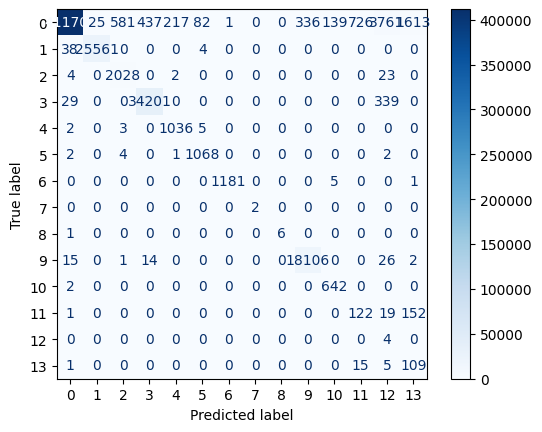

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Take a stratified 10-20% sample of the training data
X_small, _, y_small, _ = train_test_split(
    X_train, y_train,
    train_size=0.2,  # You can go lower if memory is tight
    stratify=y_train,
    random_state=42
)

# # Step 2: Apply SMOTE only to this smaller subset
# smote = SMOTE(random_state=42, n_jobs=-1)
# X_resampled, y_resampled = smote.fit_resample(X_small, y_small)

smote = SMOTE(random_state=42, k_neighbors=1, n_jobs=-1)  # k=1 handles very few samples
X_resampled, y_resampled = smote.fit_resample(X_small, y_small)

# Step 3: Check new class distribution
print("✅ Resampled class distribution:", Counter(y_resampled))
print("✅ Resampled shape:", X_resampled.shape)


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


✅ Resampled class distribution: Counter({9: 335694, 0: 335694, 1: 335694, 3: 335694, 2: 335694, 6: 335694, 5: 335694, 10: 335694, 11: 335694, 13: 335694, 4: 335694, 8: 335694, 7: 335694, 12: 335694})
✅ Resampled shape: (4699716, 30)


Top 30 Features: [' Destination Port', ' Bwd Header Length', ' Fwd Packet Length Max', ' Flow IAT Mean', ' Flow IAT Std', ' Total Length of Bwd Packets', ' Packet Length Mean', ' Bwd Packet Length Mean', ' Avg Bwd Segment Size', ' Average Packet Size', ' Max Packet Length', ' Fwd IAT Std', ' Fwd IAT Max', ' Subflow Bwd Bytes', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Fwd Packet Length Std', ' Fwd Header Length.1', ' Total Fwd Packets', ' Packet Length Std', ' Avg Fwd Segment Size', ' Packet Length Variance', 'Bwd Packet Length Max', ' Bwd Packet Length Std', ' Fwd Packet Length Mean', ' Fwd Header Length', ' act_data_pkt_fwd', 'Subflow Fwd Packets', 'Idle Mean', ' PSH Flag Count']


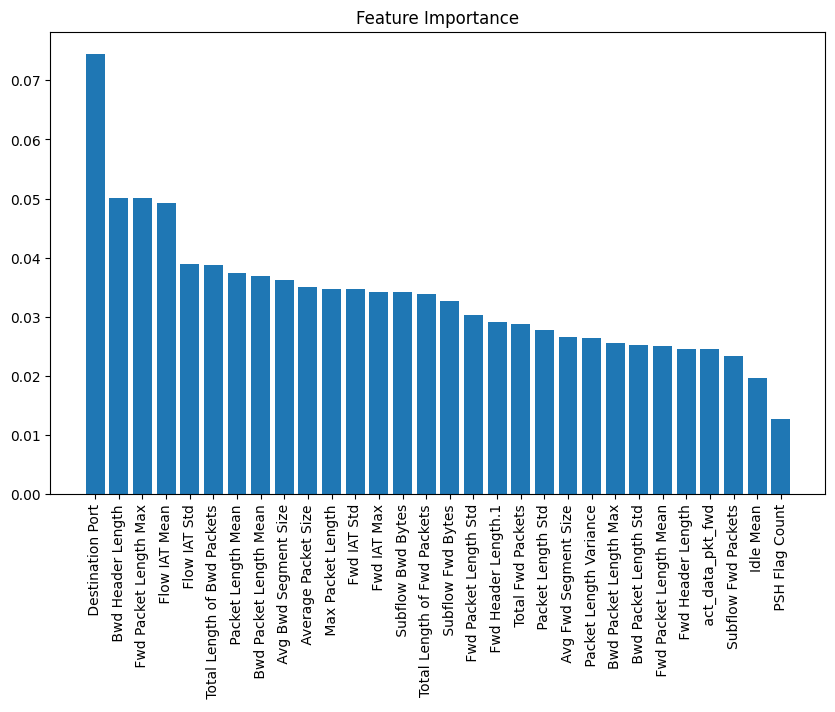

In [46]:
# Check feature importances again
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
top_features = [X_train.columns[i] for i in indices[:30]]

print("Top 30 Features:", top_features)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(top_features)), feature_importances[indices[:30]], align="center")
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.show()

In [47]:
!pip install scikit-opt

In [48]:
!pip install scikit-optimize

In [49]:
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score

# Define the fitness function for the Firefly Algorithm
def evaluate_model(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    min_samples_leaf = int(params[3])

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )
    
    # Use a subset of the data for faster computation
    subset_X = X_resampled[:5000]
    subset_y = y_resampled[:5000]
    
    scores = cross_val_score(rf, subset_X, subset_y, cv=3, scoring="accuracy")
    return -scores.mean()  # Minimize negative accuracy
# Run the Firefly Algorithm
search_results = gp_minimize(
    func=evaluate_model,
    dimensions=[
        (10, 100),  # n_estimators: Reduce upper bound for faster search
        (5, 20),    # max_depth: Reduce range
        (2, 5),     # min_samples_split
        (1, 3)      # min_samples_leaf
    ],
    n_calls=20,  # Reduce the number of calls for faster search
    random_state=42,
)

# Extract the best parameters
best_params = search_results.x
print("Optimized Hyperparameters:", best_params)

# Train the final Random Forest model with the best parameters
rf_optimized = RandomForestClassifier(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]),
    min_samples_split=int(best_params[2]),
    min_samples_leaf=int(best_params[3]),
    random_state=42,
)
rf_optimized.fit(X_resampled, y_resampled)
print("Random Forest model optimized with Firefly Algorithm!")

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:73

Optimized Hyperparameters: [100, 14, 4, 1]
Random Forest model optimized with Firefly Algorithm!


In [50]:
# Save the optimized Random Forest model
joblib.dump(rf_optimized, 'random_forest_model_optimized.pkl')
print("Optimized model saved as 'random_forest_model_optimized.pkl'")

Optimized model saved as 'random_forest_model_optimized.pkl'


In [51]:
# Predict and evaluate using the optimized model
rf_model_optimized = joblib.load('random_forest_model_optimized.pkl')
print("Optimized Model reloaded successfully!")
y_pred_optimized = rf_model_optimized.predict(X_test)
print("Optimized Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

Optimized Model reloaded successfully!
Optimized Model Performance:
Accuracy: 0.9910864746769442


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    419618
           1       1.00      1.00      1.00     25603
           2       0.72      0.99      0.83      2057
           3       0.99      0.99      0.99     34569
           4       0.99      0.98      0.98      1046
           5       1.00      0.99      1.00      1077
           6       1.00      0.99      1.00      1187
           7       1.00      1.00      1.00         2
           8       1.00      0.43      0.60         7
           9       0.99      1.00      0.99     18164
          10       0.87      1.00      0.93       644
          11       0.16      0.56      0.25       294
          12       0.00      0.00      0.00         4
          13       0.05      0.78      0.09       130

    accuracy                           0.99    504402
   macro avg       0.77      0.84      0.76    504402
weighted avg       1.00      0.99      0.99    504402



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


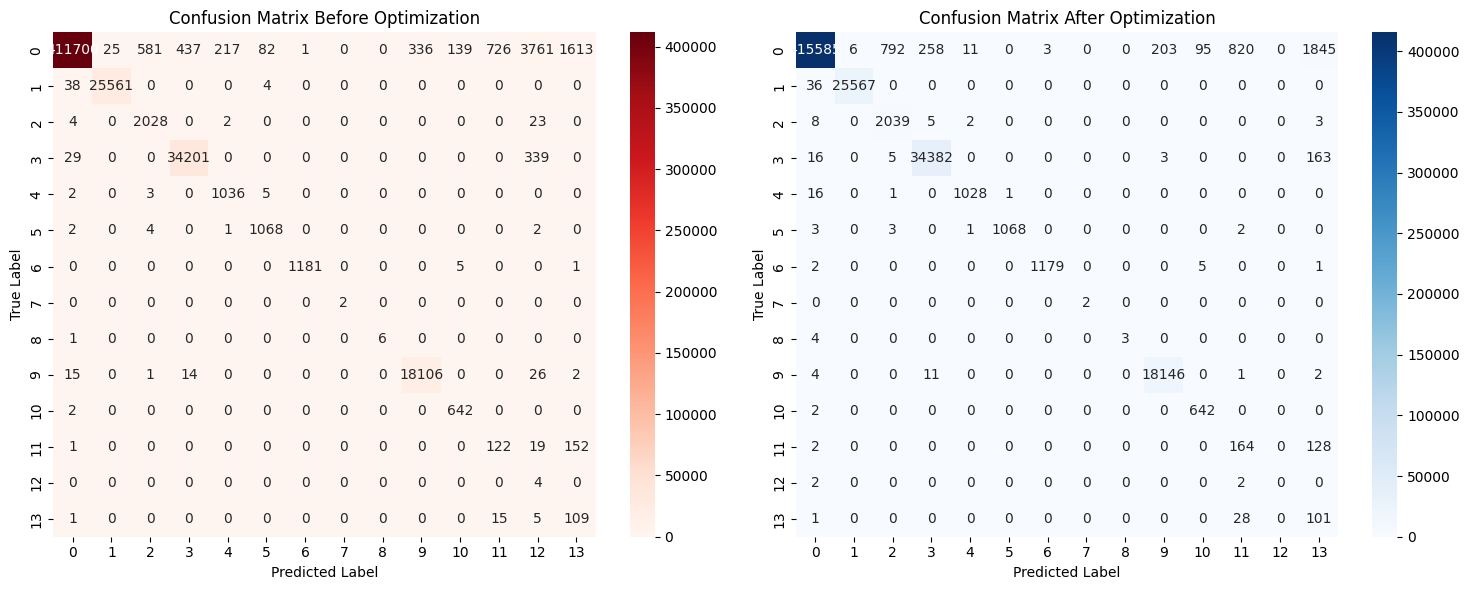

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test is your actual labels and y_pred_before/y_pred_after are predictions
y_pred_before = rf_model.predict(X_test)  # Unoptimized model predictions
y_pred_after = rf_optimized.predict(X_test)  # Optimized model predictions

# Compute confusion matrices
cm_before = confusion_matrix(y_test, y_pred_before)
cm_after = confusion_matrix(y_test, y_pred_after)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the confusion matrix before optimization
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Reds', xticklabels=True, yticklabels=True, ax=axes[0])
axes[0].set_title("Confusion Matrix Before Optimization")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot the confusion matrix after optimization
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True, ax=axes[1])
axes[1].set_title("Confusion Matrix After Optimization")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

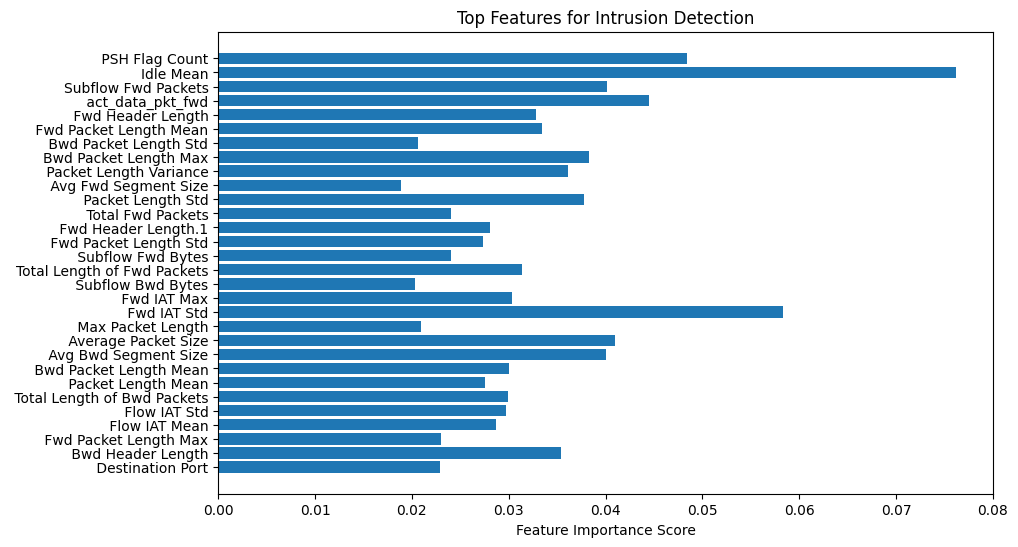

In [53]:
import matplotlib.pyplot as plt
feature_importance = rf_model_optimized.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Top Features for Intrusion Detection")
plt.show()

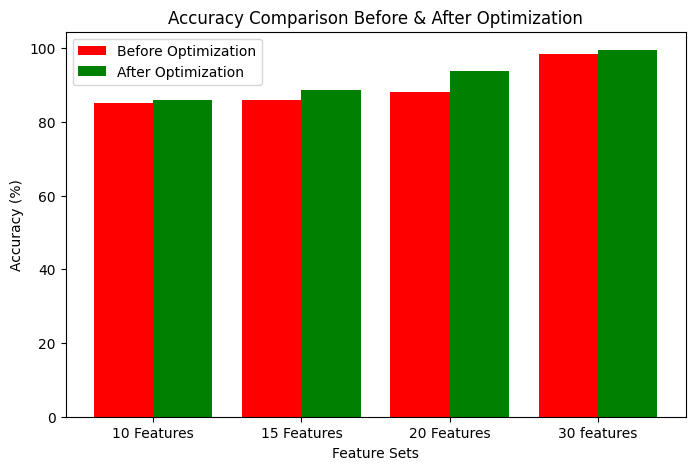

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values before and after optimization
feature_sets = ['10 Features', '15 Features', '20 Features', '30 features']
before_optimization = [84.97, 85.82, 87.95, 98.28]
after_optimization = [86.03, 88.60, 93.80, 99.45]

x = np.arange(len(feature_sets))  # X-axis labels positions

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, before_optimization, width=0.4, label='Before Optimization', color='red')
plt.bar(x + 0.2, after_optimization, width=0.4, label='After Optimization', color='green')

plt.xlabel('Feature Sets')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Before & After Optimization')
plt.xticks(x, feature_sets)
plt.legend()
plt.show()

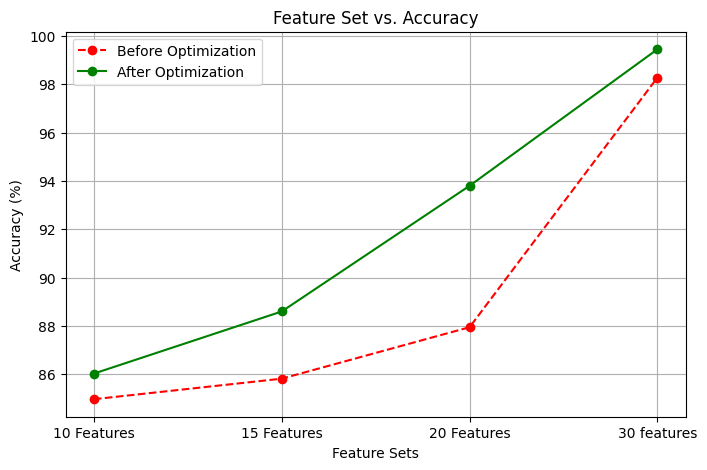

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(feature_sets, before_optimization, marker='o', linestyle='--', color='red', label='Before Optimization')
plt.plot(feature_sets, after_optimization, marker='o', linestyle='-', color='green', label='After Optimization')

plt.xlabel('Feature Sets')
plt.ylabel('Accuracy (%)')
plt.title('Feature Set vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()